In [625]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette(sns.color_palette("RdBu", n_colors=8, desat=1.))
sns.set_style("white")
sns.set_style({'grid.color': '0.95'})
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [626]:
NORB = 3
NK = 512
NY = 5
NA = 4
U = 16
BETA = 20
MU = 10.57

simDir = "../data/U" + str(U) +\
                 "-BETA" + str(BETA) +\
                 "-MU" + str(MU)

filling = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[4, 1]
final_gp = np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[5, 1]
it = int(np.genfromtxt(simDir + "/parameters.csv", delimiter = ',')[6, 1])
TBbands = np.loadtxt(simDir + "/free-bands.csv")
nUp = np.loadtxt(simDir + "/nUp.csv", delimiter = ',')
nDw = np.loadtxt(simDir + "/nDw.csv", delimiter = ',')
bandsUp = np.loadtxt(simDir +"/bandsUp.csv")
bandsDw = np.loadtxt(simDir +"/bandsDw.csv")
grand_potential = np.loadtxt(simDir +"/grand_potential_evol.csv")

In [627]:
filling

0.66666700000000001

In [628]:
final_gp

-3.2469100000000002

Text(0,0.5,'Grandpotential functional (per site) $[eV]$')

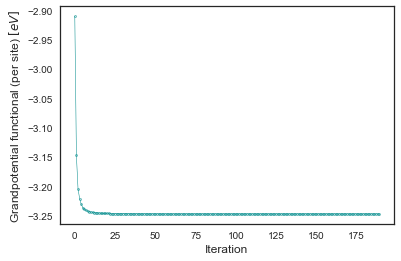

In [629]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(grand_potential[:it],\
        marker = 'o', markersize = 0.5,\
        markeredgewidth = 2, color = 'darkcyan', linewidth = 0.5)
ax.set_xlabel(r'Iteration', fontsize = 12)
ax.set_ylabel(r'Grandpotential functional (per site) $[eV]$',\
fontsize = 12)

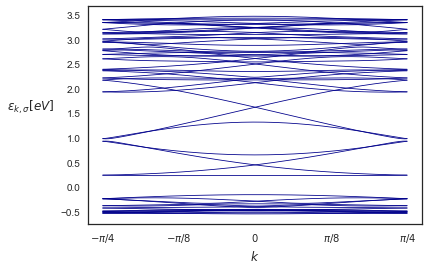

In [630]:
fig = plt.figure(2, figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.linspace(-np.pi / NA, np.pi / NA, num=NK,\
        endpoint=False), TBbands, linewidth = 0.8, color = 'darkblue')
ax.set_xlabel(r'$k$', fontsize = 12)
ax.set_ylabel(r'$\varepsilon_{k, \sigma} [eV]$', rotation = 0,\
fontsize = 12, labelpad = 30)
ax.set_xticks([-np.pi / NA, -np.pi / NA / 2, 0, np.pi / NA / 2, np.pi / NA])
if NA == 1:
    ax.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$'])
else:
    ax.set_xticklabels([r'$-\pi / ' + str(NA) + '$', r'$-\pi / ' + str(NA * 2) + '$',\
                        r'$0$', r'$\pi / ' + str(NA * 2) + '$', r'$\pi / ' + str(NA) + '$'])

-0.6960287806 -0.25543866072
-0.4493756027 -0.4512372284


[]

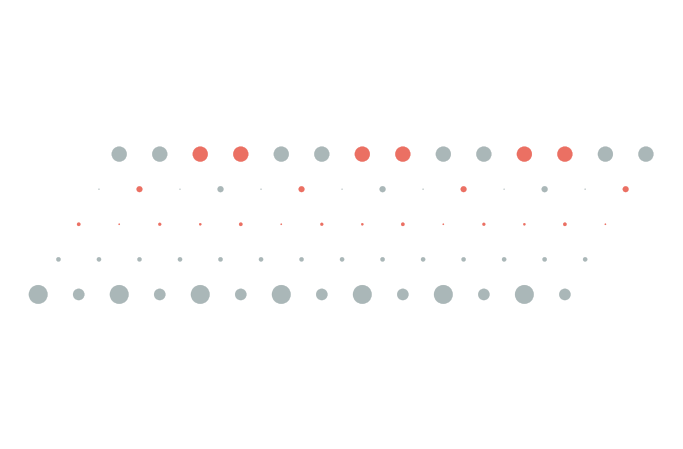

In [631]:
fig = plt.figure(1, figsize=(12, 8))
nx=14
dotscale = 500
clr = np.chararray((nx * NY), itemsize = 10)
a1 = np.arange(nx)
a2 = np.arange(NY)
lat = np.zeros((nx * NY))
vs = np.zeros((nx * NY , 2))
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(nx):
    for j in range(NY):
        vs[nx * j + i, :] =\
        a1[i] * v1 + a2[j] * v2
        a = (i + NA) % NA
        lat[nx * j + i] \
        = ( nUp[NORB * (NY * a + j)]\
        + nUp[1 + NORB * (NY * a + j)]\
        + nUp[2 + NORB * (NY * a + j)]\
        - nDw[NORB * (NY * a + j)]\
        - nDw[1 + NORB * (NY * a + j)]\
        - nDw[2 + NORB * (NY * a + j)])
        if lat[nx * j + i] > 0:
            clr[nx * j + i] = "#e74c3c"
        else:
            clr[nx * j + i] = "#95a5a6"
print(lat[0], lat[1])
print(lat[nx* (NY - 1)], lat[nx* (NY - 1) + 1])

ax = fig.add_subplot(111)
ax.axis('off')
ax.scatter(vs[:, 0], vs[:, 1],\
s = dotscale * abs(lat),\
c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None)
ax.axis('equal')
ax.set_yticklabels([])
ax.set_xticklabels([])